In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from dbds import generate_hotel_dfs
from agg import prep_demand_features
from agg_utils import stly_cols_agg, ly_cols_agg, stly_pace_cols, ty_pace_cols

pd.options.display.max_rows = 150
pd.options.display.max_columns = 250
pd.options.display.max_colwidth = None

h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")

In [7]:
DATE_FMT = "%Y-%m-%d"

In [2]:
%%time
h1_stats = prep_demand_features(1)

CPU times: user 1min 4s, sys: 224 ms, total: 1min 4s
Wall time: 1min 9s


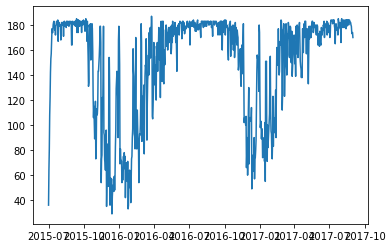

In [3]:
# add hotel stats?
plt.plot(h1_dbd.index, h1_dbd.RoomsSold)
plt.xticklabels=["2015", "2016", "2017"]

In [4]:
%%time
h2_stats = prep_demand_features(2)

CPU times: user 1min 5s, sys: 207 ms, total: 1min 6s
Wall time: 1min 11s


In [5]:
h1_stats.to_csv("../data/h1_stats.csv")
h1_stats.to_pickle("../data/h1_stats.pick")
h2_stats.to_csv("../data/h2_stats.csv")
h2_stats.to_pickle("../data/h2_stats.pick")

## Plotting

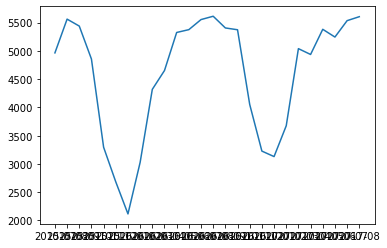

In [6]:
h1_dbd["year"] = pd.Series(h1_dbd.index).dt.year.astype(str)
h1_dbd["month"] = pd.Series(h1_dbd.index).dt.month
year_months = h1_dbd.index.map(lambda x: dt.datetime.strftime(x, format="%Y-%m"))
h1_dbd["year_month"] = year_months
by_month = h1_dbd[['year_month', 'RoomsSold']].groupby("year_month").agg("sum")
plt.xticklabels = [list(h1_dbd.year_month.unique())]
plt.xticklabelrotation = 90

plt.plot(by_month)


In [19]:


a

array([-0.25, -0.2 , -0.15, -0.1 , -0.05,  0.05,  0.1 ,  0.15,  0.2 ,
        0.25])